In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

## Simple/Polynomial Linear Regression

#### Run a simple linear regression performing train-test split on salary data file and generate the line plot of predicted vs test values.

In [3]:
salary = pd.read_csv("data/Salary_Data.csv")

Designate variables

In [22]:
X = salary.YearsExperience.values
y = salary.Salary.values

Split data in train/test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Linear Regression of training data

In [24]:
lin_model = LinearRegression()

In [25]:
lin_model.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predictions using Linear Model

In [26]:
pred = lin_model.predict(X_test.reshape(-1,1))

Visualize performance of the Linear Model

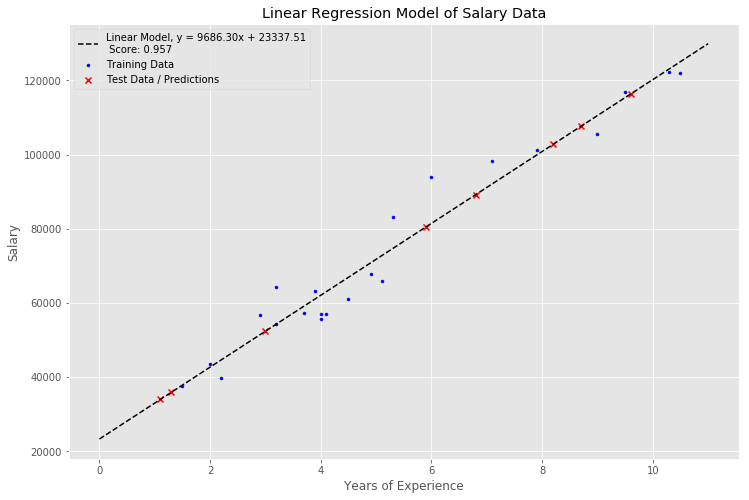

In [27]:
plt.scatter(X_train, y_train, marker='.', color='b', label="Training Data")
plt.scatter(X_test, pred, marker='x', color='r', label="Test Data / Predictions")

max_X = int(max(max(X_test), max(X_train)))
x = list(range(max_X + 2))

intercept = lin_model.intercept_
coef = lin_model.coef_[0]
score = lin_model.score(X_train.reshape(-1,1), y_train)

f = lambda x: intercept + coef*x
plt.plot(x, [f(i) for i in x], color='k', 
         linestyle='dashed', 
         label="Linear Model, y = {:.2f}x + {:.2f}\n Score: {:.3f}".format(coef, 
                                                                           intercept,
                                                                           score))

plt.title("Linear Regression Model of Salary Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
None

#### Perform a polynomial regression of salary feature with degrees 2,3, and 4 and compare the results.

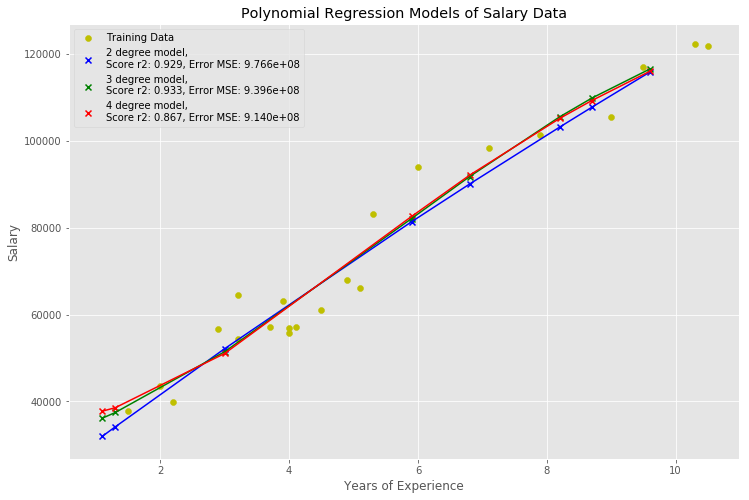

In [28]:
degrees = [2,3,4]
colors = ['b', 'g', 'r']

plt.scatter(X_train, y_train, color='y', label="Training Data")
for i, degree in enumerate(degrees):
    lin_reg = LinearRegression()
    poly_model = PolynomialFeatures(degree)
    
    X_transform = poly_model.fit_transform(X_train.reshape(-1,1))
    X_test_transform = poly_model.transform(sorted(X_test.reshape(-1,1)))
    
    lin_reg.fit(X_transform, y_train)
    poly_pred = lin_reg.predict(X_test_transform)
    scoring = "r2"
    score = cross_val_score(lin_reg, X_transform, y_train, scoring=scoring)[0]
    error = mean_squared_error(y_test, poly_pred)
    
    plt.scatter(sorted(X_test), poly_pred, 
                color=colors[i],
                marker = 'x',
                label="{} degree model,\nScore {}: {:.3f}, Error {}: {:.3e}".format(degree, scoring, score, "MSE", error))
    plt.plot(sorted(X_test), poly_pred, color=colors[i])
    
plt.title("Polynomial Regression Models of Salary Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
None

#### Which one of the 4 models will you use and why?

It is unrealistic to assume that Salary has a perfectly linear relationship with years of experience. Intuitively, it seems safe to assume that salary might have a cap at some point regardless of how much experience is acquired.

#### Run experiments on the data, and, with each iteration of the experiment, call train_test_split to vary the training/testing data

In [56]:
def lin_reg_iterations(X_: pd.DataFrame, y_: pd.Series, n_iters: int) -> None:
    intercept, coef, score = list(), list(), list()
    for i in range(n_iters):
        X_train, X_test, y_train, y_test = train_test_split(X_, y_)

        lin_model = LinearRegression()
        lin_model.fit(X_train.reshape(-1,1), y_train)
        lin_model.predict(y_test)
        
        intercept.append(lin_model.intercept_)
        coef.append(lin_model.coef_[0])
        score.append(lin_model.score(X_train.reshape(-1,1), y_train))

        
    results = [intercept, coef, score]    
    return [np.mean(thing) for thing in results]

In [74]:
def plot_lin_reg(lin_model_, X_train, X_test, y_train, y_test, intercept, coef, score):
    plt.scatter(X_train, y_train, marker='.', color='b', label="Training Data")
    plt.scatter(X_test, pred, marker='x', color='r', label="Test Data / Predictions")

    max_X = int(max(max(X_test), max(X_train)))
    x = list(range(max_X + 2))
    f = lambda x: intercept + coef*x
    plt.plot(x, [f(i) for i in x], color='k', 
             linestyle='dashed', 
             label="Linear Model, y = {:.2f}x + {:.2f}\n Score: {:.3f}".format(coef, 
                                                                               intercept,
                                                                               score))

    plt.title("Linear Regression Model of Salary Data")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    None

In [57]:
lin_reg_iterations(X, y.reshape(-1,1), 10)

[25711.975107222617, 9485.326208439035, 0.9533084655436701]

In [ ]:
plot_lin_reg(lin_model,
             X_train,
             X_test,
             y_train,
             y_test,
             *lin_reg_iterations(X, y.reshape(-1,1), 10))

---

#### Run experiments with hold out on the original data - actual test data in addition to the training/testing(validation) sets

In [76]:
X = salary.YearsExperience.values
y = salary.Salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [79]:
lin_reg_iterations(X_train, y_train.reshape(-1,1), 10)

[25661.24636314522, 9524.251289087735, 0.9555825676268729]

In [80]:
pred = lin_model.predict(X_test.reshape(-1,1))

---